<a href="https://colab.research.google.com/github/alvesnicole/RareSpeciesDataset/blob/main/especiescorreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importações**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import cv2
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# **Carregamento do dataset**

In [ ]:
# Carregamento do sataset
dataset = load_dataset("imageomics/rare-species")
print("Dataset carregado com sucesso!")

Dataset carregado com sucesso!


#**EDA - Análise Exploratória de dados**


ANÁLISE EXPLORATÓRIA COMPLETA - RARE SPECIES DATASET
📊 Total de exemplos no dataset: 11,983

🏗️  Estrutura dos dados:
   🖼️  file_name: Image (400, 400) (mode: RGB)
   📝 rarespecies_id: str = 75fd91cb-2881-41cd-88e6-de451e8b60e2
   📝 eol_content_id: str = 12853737
   📝 eol_page_id: str = 449393
   📝 kingdom: str = Animalia
   📝 phylum: str = Mollusca
   📝 class: str = Bivalvia
   📝 order: str = Unionida
   📝 family: str = Unionidae
   📝 genus: str = Cyclonaias
   📝 species: str = tuberculata
   📝 sciName: str = Cyclonaias tuberculata
   📝 common: str = purple wartyback

🌿 ANÁLISE TAXONÔMICA:

   KINGDOM:
      Número único: 1
      5 mais comuns:
        Animalia: 11983 (100.0%)

   PHYLUM:
      Número único: 5
      5 mais comuns:
        Chordata: 9952 (83.1%)
        Arthropoda: 951 (7.9%)
        Cnidaria: 810 (6.8%)
        Mollusca: 210 (1.8%)
        Echinodermata: 60 (0.5%)

   CLASS:
      Número único: 15
      5 mais comuns:
        Aves: 2909 (24.3%)
        Mammalia: 225

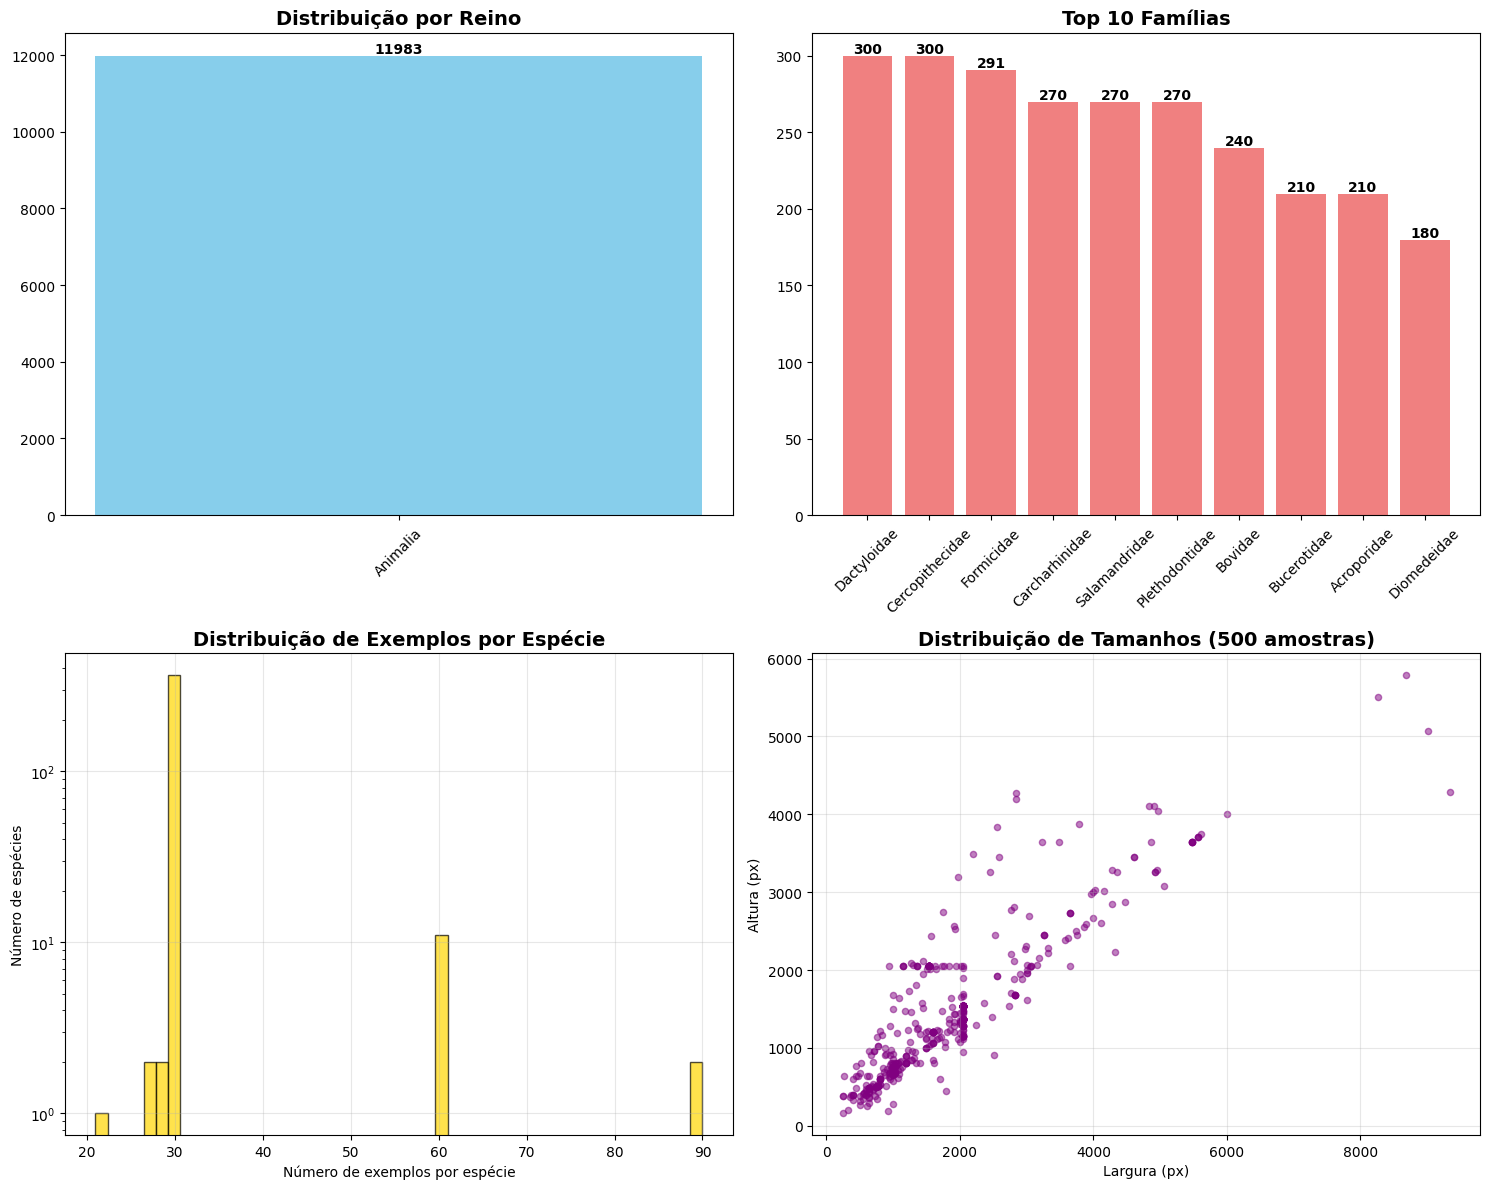


🖼️  VISUALIZANDO AMOSTRAS COM INFORMAÇÕES TAXONÔMICAS:


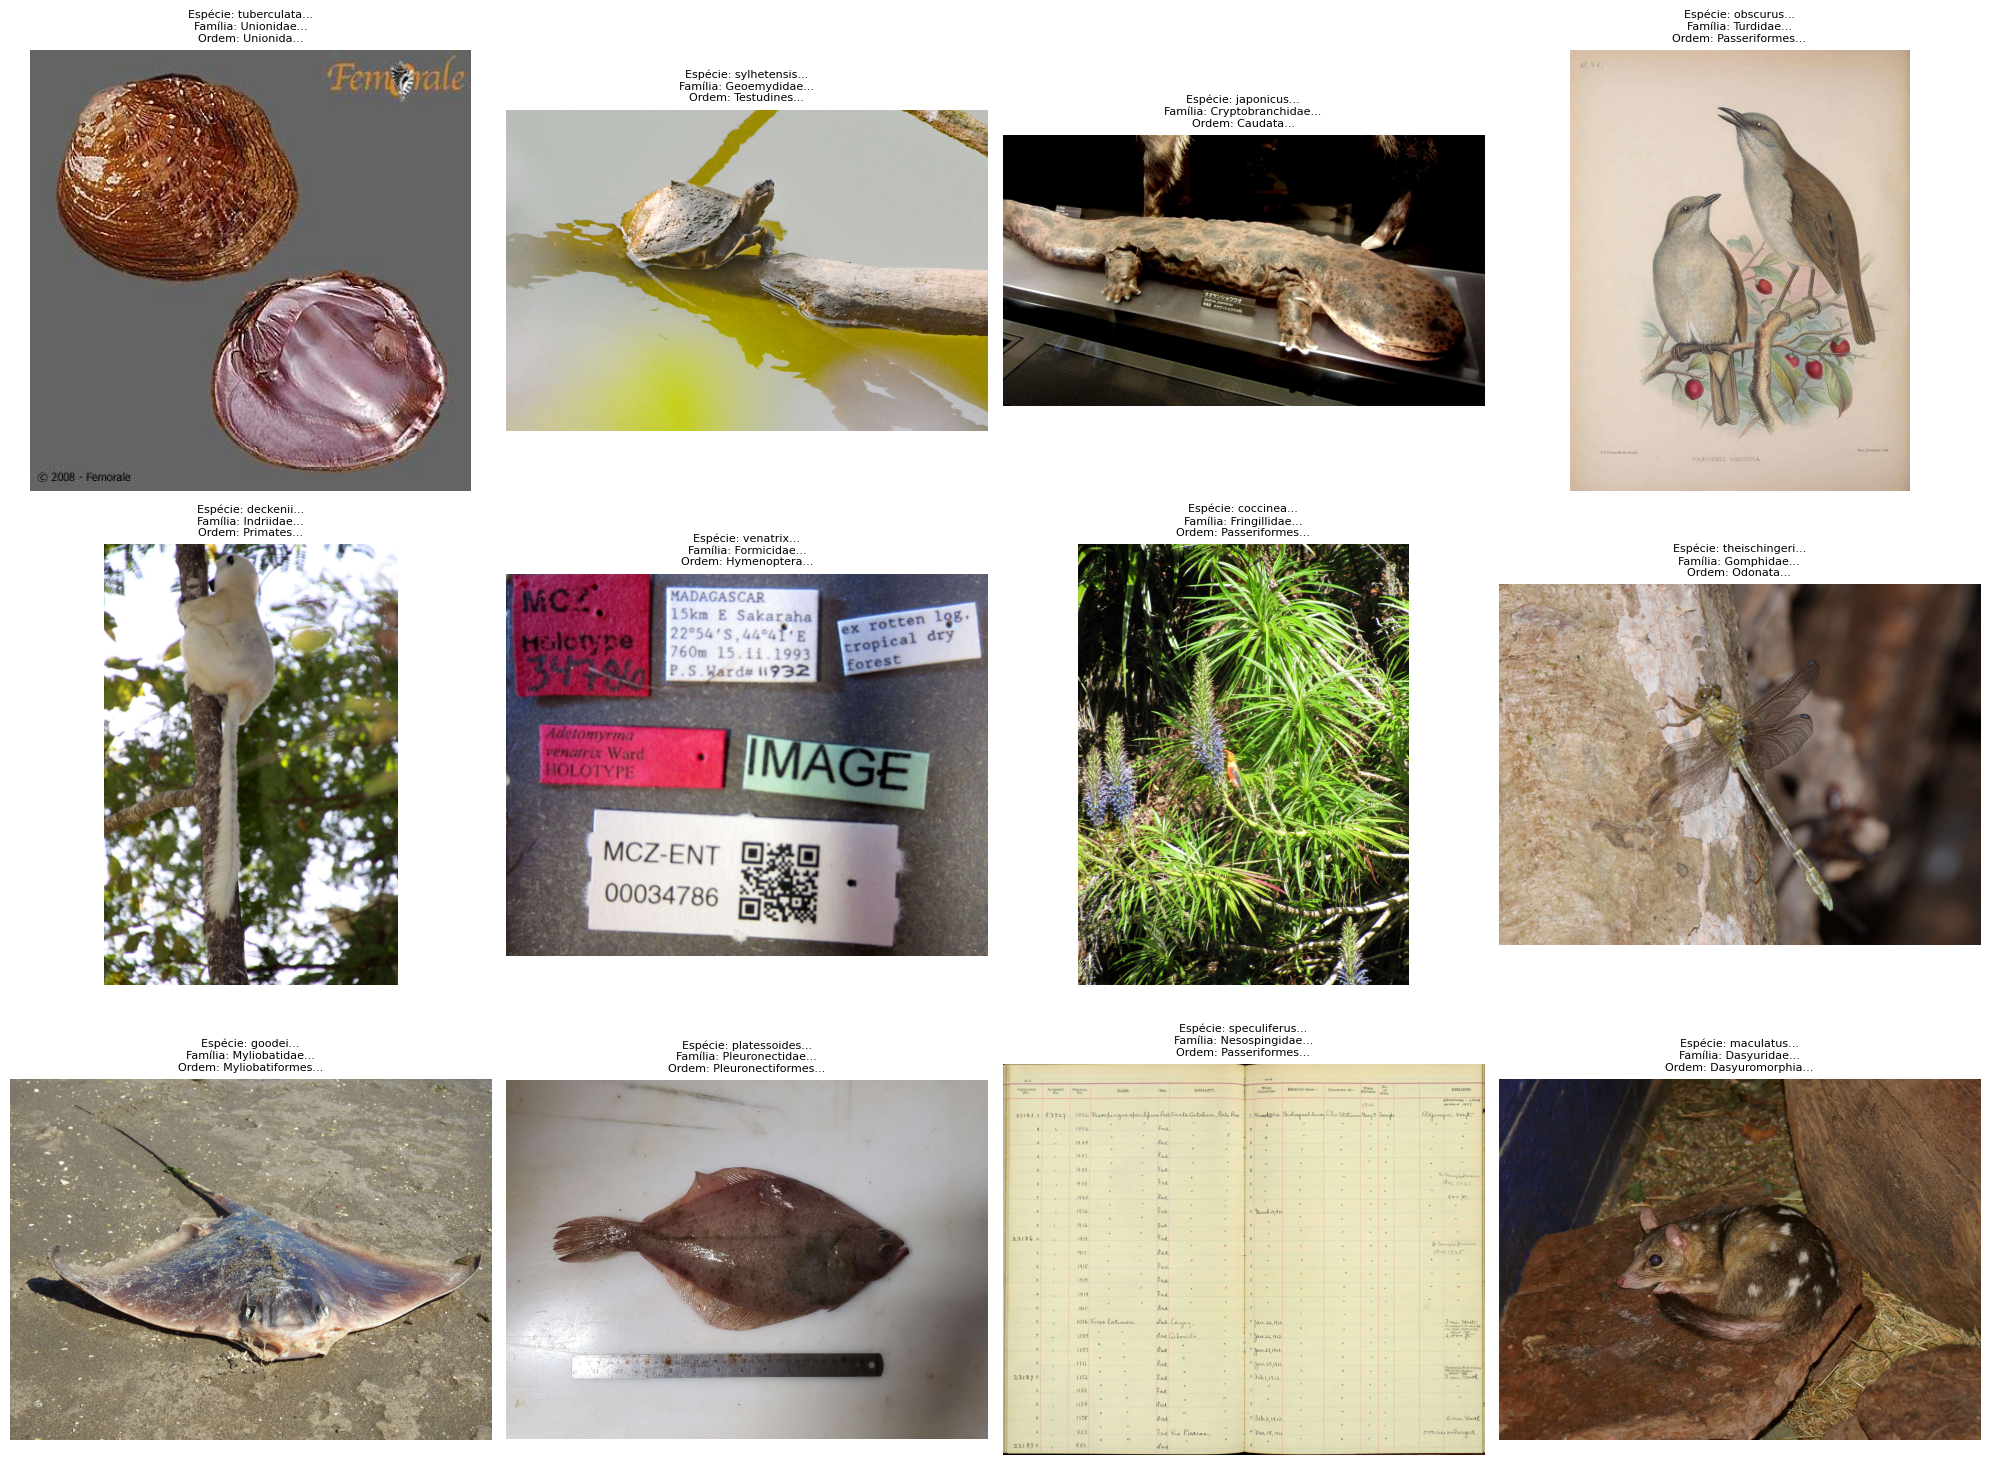


🔍 ANÁLISE DE QUALIDADE DOS DADOS:

📝 Verificando valores missing por nível taxonômico:
   kingdom   :    0 valores missing (0.00%)
   phylum    :    0 valores missing (0.00%)
   class     :    0 valores missing (0.00%)
   order     :    0 valores missing (0.00%)
   family    :    0 valores missing (0.00%)
   genus     :    0 valores missing (0.00%)
   species   :    0 valores missing (0.00%)

📈 Espécies com apenas 1 exemplo: 0 (0.0%)

📊 Distribuição de exemplos por espécie:
   Média: 31.12
   Mediana: 30.00
   Máximo: 90
   Mínimo: 21


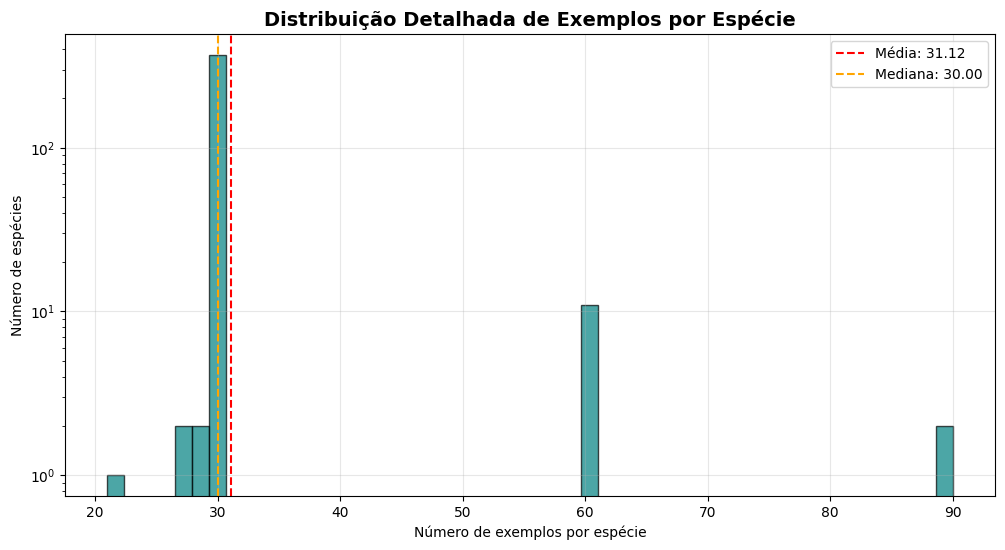


📋 CONVERTENDO PARA DATAFRAME PARA ANÁLISE:
DataFrame criado com 11983 linhas e 10 colunas

Primeiras 5 linhas:
  file_name   kingdom    phylum     class          order            family  \
0   image_0  Animalia  Mollusca  Bivalvia       Unionida         Unionidae   
1   image_1  Animalia  Chordata  Reptilia     Testudines       Geoemydidae   
2   image_2  Animalia  Chordata  Amphibia        Caudata  Cryptobranchidae   
3   image_3  Animalia  Chordata      Aves  Passeriformes          Turdidae   
4   image_4  Animalia  Chordata  Mammalia       Primates         Indriidae   

         genus      species                 sciName                     common  
0   Cyclonaias  tuberculata  Cyclonaias tuberculata           purple wartyback  
1    Pangshura  sylhetensis   Pangshura sylhetensis        Assam Roofed Turtle  
2      Andrias    japonicus       Andrias japonicus  Japanese Giant Salamander  
3    Myadestes     obscurus      Myadestes obscurus                     'Oma'o  
4  Propithecus

In [ ]:
def comprehensive_eda(dataset):
    print("\n" + "="*80)
    print("ANÁLISE EXPLORATÓRIA COMPLETA - RARE SPECIES DATASET")
    print("="*80)

    train_data = dataset['train']
    print(f"📊 Total de exemplos no dataset: {len(train_data):,}")

    # Analisar estrutura dos dados
    print(f"\n🏗️  Estrutura dos dados:")
    example = train_data[0]
    for key, value in example.items():
        if key == 'file_name':
            img = value
            print(f"   🖼️  {key}: Image {img.size} (mode: {img.mode})")
        else:
            print(f"   📝 {key}: {type(value).__name__} = {value}")

    # Análise das categorias taxonômicas
    print(f"\n🌿 ANÁLISE TAXONÔMICA:")
    taxonomic_levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

    for level in taxonomic_levels:
        values = train_data[level]
        unique_values = set(values)
        print(f"\n   {level.upper()}:")
        print(f"      Número único: {len(unique_values)}")

        # Mostrar as categorias mais comuns
        counter = Counter(values)
        print(f"      5 mais comuns:")
        for value, count in counter.most_common(5):
            print(f"        {value}: {count} ({count/len(values)*100:.1f}%)")

    # Análise de espécies
    species_counter = Counter(train_data['species'])
    print(f"\n   📈 Estatísticas de Espécies:")
    print(f"      Total de espécies únicas: {len(species_counter)}")
    print(f"      Espécies com apenas 1 exemplo: {sum(1 for count in species_counter.values() if count == 1)}")
    print(f"      Espécies mais comuns:")
    for species, count in species_counter.most_common(10):
        print(f"        {species}: {count} exemplos")

    # Análise de imagens
    print(f"\n📷 ANÁLISE DAS IMAGENS:")
    heights = []
    widths = []
    aspects = []

    # Amostra para performance: usar índices inteiros
    sample_size = min(1000, len(train_data))
    indices = np.random.choice(len(train_data), sample_size, replace=False)

    for idx in indices:
        item = train_data[int(idx)]
        img = item['file_name']
        if isinstance(img, Image.Image):
            heights.append(img.height)
            widths.append(img.width)
            aspects.append(img.width / img.height if img.height > 0 else 0)

    if heights:  # Só calcular se houver imagens
        print(f"   Estatísticas baseadas em {len(heights)} amostras:")
        print(f"      Altura: {np.min(heights):.0f} - {np.max(heights):.0f} px (mediana: {np.median(heights):.0f})")
        print(f"      Largura: {np.min(widths):.0f} - {np.max(widths):.0f} px (mediana: {np.median(widths):.0f})")
        print(f"      Aspect Ratio: {np.min(aspects):.2f} - {np.max(aspects):.2f} (mediana: {np.median(aspects):.2f})")

    return train_data, taxonomic_levels

# Executar EDA
train_data, taxonomic_levels = comprehensive_eda(dataset)

# Visualização das distribuições
def plot_taxonomic_distributions(train_data):
    print(f"\n📊 VISUALIZAÇÃO DAS DISTRIBUIÇÕES:")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Distribuição por reino
    kingdoms = train_data['kingdom']
    kingdom_counts = Counter(kingdoms)
    axes[0,0].bar(kingdom_counts.keys(), kingdom_counts.values(), color=['skyblue', 'lightgreen'])
    axes[0,0].set_title('Distribuição por Reino', fontsize=14, fontweight='bold')
    axes[0,0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(kingdom_counts.values()):
        axes[0,0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

    # Top 10 famílias
    families = train_data['family']
    family_counts = Counter(families).most_common(10)
    family_names = [fam[0] for fam in family_counts]
    family_values = [fam[1] for fam in family_counts]
    bars = axes[0,1].bar(family_names, family_values, color='lightcoral')
    axes[0,1].set_title('Top 10 Famílias', fontsize=14, fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)
    for bar, v in zip(bars, family_values):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(v),
                      ha='center', va='bottom', fontweight='bold')

    # Distribuição do número de exemplos por espécie
    species_counts = list(Counter(train_data['species']).values())
    axes[1,0].hist(species_counts, bins=50, alpha=0.7, color='gold', edgecolor='black')
    axes[1,0].set_title('Distribuição de Exemplos por Espécie', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Número de exemplos por espécie')
    axes[1,0].set_ylabel('Número de espécies')
    axes[1,0].set_yscale('log')
    axes[1,0].grid(True, alpha=0.3)

    # Tamanhos das imagens
    heights = []
    widths = []
    sample_size = min(500, len(train_data))
    for i in range(sample_size):
        item = train_data[i]
        img = item['file_name']
        if isinstance(img, Image.Image):
            heights.append(img.height)
            widths.append(img.width)

    if heights:  # Só plotar se houver dados
        axes[1,1].scatter(widths, heights, alpha=0.5, color='purple', s=20)
        axes[1,1].set_xlabel('Largura (px)')
        axes[1,1].set_ylabel('Altura (px)')
        axes[1,1].set_title(f'Distribuição de Tamanhos ({len(heights)} amostras)', fontsize=14, fontweight='bold')
        axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_taxonomic_distributions(train_data)

# Visualizar amostras de imagens com informações taxonômicas
def visualize_samples_with_taxonomy(train_data, num_samples=12):
    print(f"\n🖼️  VISUALIZANDO AMOSTRAS COM INFORMAÇÕES TAXONÔMICAS:")

    # Selecionar amostras sequenciais para evitar problemas de índice
    indices = list(range(min(num_samples, len(train_data))))

    cols = 4
    rows = (num_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))

    if rows == 1:
        axes = axes.reshape(1, -1) if cols > 1 else [axes]
    else:
        axes = axes.reshape(rows, cols)

    for idx, sample_idx in enumerate(indices):
        row = idx // cols
        col = idx % cols

        example = train_data[sample_idx]  # Acesso direto
        img = example['file_name']

        if isinstance(img, Image.Image):
            axes[row, col].imshow(np.array(img))

            # Criar título com informações taxonômicas
            title = f"Espécie: {example['species'][:30]}...\n"
            title += f"Família: {example['family'][:20]}...\n"
            title += f"Ordem: {example['order'][:20]}..."

            axes[row, col].set_title(title, fontsize=8)
            axes[row, col].axis('off')

    # Esconder eixos extras
    for idx in range(len(indices), rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

visualize_samples_with_taxonomy(train_data)

# Análise adicional de qualidade dos dados
def data_quality_analysis(train_data):
    print(f"\n🔍 ANÁLISE DE QUALIDADE DOS DADOS:")
    print("="*50)

    # Verificar valores missing
    taxonomic_levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

    print("\n📝 Verificando valores missing por nível taxonômico:")
    for level in taxonomic_levels:
        values = train_data[level]
        empty_count = sum(1 for v in values if v is None or v == '' or v == 'Unknown')
        print(f"   {level:10}: {empty_count:4} valores missing ({empty_count/len(values)*100:.2f}%)")

    # Verificar duplicatas por espécie
    species_counts = Counter(train_data['species'])
    single_instance_species = sum(1 for count in species_counts.values() if count == 1)
    print(f"\n📈 Espécies com apenas 1 exemplo: {single_instance_species} ({single_instance_species/len(species_counts)*100:.1f}%)")

    # Distribuição de exemplos por espécie
    print(f"\n📊 Distribuição de exemplos por espécie:")
    counts_by_species = list(species_counts.values())
    print(f"   Média: {np.mean(counts_by_species):.2f}")
    print(f"   Mediana: {np.median(counts_by_species):.2f}")
    print(f"   Máximo: {np.max(counts_by_species)}")
    print(f"   Mínimo: {np.min(counts_by_species)}")

    # Plotar distribuição detalhada
    plt.figure(figsize=(12, 6))
    plt.hist(counts_by_species, bins=50, alpha=0.7, color='teal', edgecolor='black')
    plt.axvline(np.mean(counts_by_species), color='red', linestyle='--', label=f'Média: {np.mean(counts_by_species):.2f}')
    plt.axvline(np.median(counts_by_species), color='orange', linestyle='--', label=f'Mediana: {np.median(counts_by_species):.2f}')
    plt.xlabel('Número de exemplos por espécie')
    plt.ylabel('Número de espécies')
    plt.title('Distribuição Detalhada de Exemplos por Espécie', fontsize=14, fontweight='bold')
    plt.yscale('log')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

data_quality_analysis(train_data)

# Converter para DataFrame para análise mais fácil
def convert_to_dataframe(train_data):
    print(f"\n📋 CONVERTENDO PARA DATAFRAME PARA ANÁLISE:")

    # Criar lista de dicionários
    data_list = []
    for i in range(len(train_data)):
        item = train_data[i]
        data_list.append({
            'file_name': f"image_{i}",
            'kingdom': item['kingdom'],
            'phylum': item['phylum'],
            'class': item['class'],
            'order': item['order'],
            'family': item['family'],
            'genus': item['genus'],
            'species': item['species'],
            'sciName': item['sciName'],
            'common': item['common']
        })

    df = pd.DataFrame(data_list)
    print(f"DataFrame criado com {len(df)} linhas e {len(df.columns)} colunas")
    print(f"\nPrimeiras 5 linhas:")
    print(df.head())

    return df

# Criar DataFrame
df = convert_to_dataframe(train_data)

# Análise hierárquica taxonômica
def taxonomic_hierarchy_analysis(df):
    print(f"\n🌳 ANÁLISE HIERÁRQUICA TAXONÔMICA:")
    print("="*50)

    # Número único em cada nível
    for level in ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']:
        unique_count = df[level].nunique()
        print(f"{level:10}: {unique_count:5} categorias únicas")

    # Análise de relação entre níveis
    print(f"\n🔗 Relação entre níveis taxonômicos:")
    print(f"Espécies por gênero:")
    species_per_genus = df.groupby('genus')['species'].nunique()
    print(f"   Média: {species_per_genus.mean():.2f}")
    print(f"   Máximo: {species_per_genus.max()}")

    print(f"\nGêneros por família:")
    genera_per_family = df.groupby('family')['genus'].nunique()
    print(f"   Média: {genera_per_family.mean():.2f}")
    print(f"   Máximo: {genera_per_family.max()}")

taxonomic_hierarchy_analysis(df)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import cv2
from collections import Counter

# Dataset class
class RareSpeciesDataset(Dataset):
    def __init__(self, data_list, target_level='family', transform=None):
        self.data_list = data_list
        self.target_level = target_level
        self.transform = transform

        # Extrair labels
        self.labels = [item[target_level] for item in data_list]

        # Codificar labels
        self.label_encoder = LabelEncoder()
        self.encoded_labels = self.label_encoder.fit_transform(self.labels)
        self.num_classes = len(self.label_encoder.classes_)

        print(f"🎯 Nível alvo: {target_level}")
        print(f"📊 Número de classes: {self.num_classes}")
        print(f"📈 Top 5 classes mais comuns:")
        label_counts = Counter(self.labels)
        for label, count in label_counts.most_common(5):
            print(f"   {label}: {count} exemplos ({count/len(self.labels)*100:.1f}%)")

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        item = self.data_list[idx]
        original_idx = item['original_index']

        try:
            # Acessar imagem do dataset original
            img_item = train_data[original_idx]
            image = img_item['file_name']

            # Converter para numpy array se for PIL Image
            if isinstance(image, Image.Image):
                image = np.array(image)

            # CONVERSÃO ROBUSTA PARA RGB
            if len(image.shape) == 2:  # Imagem em escala de cinza
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
            elif image.shape[2] == 4:  # RGBA
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
            elif image.shape[2] == 1:  # 1 canal
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
            # Se já for RGB (3 canais), não faz nada

            # Aplicar transformações
            if self.transform:
                transformed = self.transform(image=image)
                image = transformed['image']

            label = self.encoded_labels[idx]
            return image, label

        except Exception as e:
            print(f"❌ Erro no item {idx}: {e}")
            # Fallback: imagem cinza 224x224
            dummy_image = np.ones((224, 224, 3), dtype=np.uint8) * 128
            if self.transform:
                dummy_image = self.transform(image=dummy_image)['image']
            return dummy_image, 0

# Transformações SIMPLIFICADAS sem Lambda problemático
def get_transforms(img_size=224):
    train_transform = A.Compose([
        A.Resize(img_size, img_size),
        A.HorizontalFlip(p=0.3),
        A.RandomRotate90(p=0.2),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.3),
        A.RandomBrightnessContrast(p=0.2),
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        ),
        ToTensorV2(),
    ])

    val_transform = A.Compose([
        A.Resize(img_size, img_size),
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        ),
        ToTensorV2(),
    ])

    return train_transform, val_transform

# Preparar dados de forma robusta
def prepare_robust_dataloaders(train_data, target_level='family', batch_size=32, img_size=224, val_ratio=0.2):
    print("🔄 Preparando dataloaders robustos...")

    train_transform, val_transform = get_transforms(img_size)

    # Criar lista de dados
    data_list = []
    for i in range(len(train_data)):
        item = train_data[i]
        data_list.append({
            'original_index': i,
            'kingdom': item['kingdom'],
            'phylum': item['phylum'],
            'class': item['class'],
            'order': item['order'],
            'family': item['family'],
            'genus': item['genus'],
            'species': item['species'],
            'target': item[target_level]
        })

    # Dividir dados
    train_list, val_list = train_test_split(
        data_list,
        test_size=val_ratio,
        random_state=42,
        stratify=[item['target'] for item in data_list]
    )

    print(f"📊 Divisão: {len(train_list)} treino, {len(val_list)} validação")

    # Criar datasets
    train_dataset = RareSpeciesDataset(train_list, target_level, train_transform)
    val_dataset = RareSpeciesDataset(val_list, target_level, val_transform)

    # Criar dataloaders com num_workers=0 para debug
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,  # 0 para evitar problemas
        pin_memory=False
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        pin_memory=False
    )

    return train_loader, val_loader, train_dataset

# Testar com family (menos classes)
print("🧪 TESTANDO COM FAMILY LEVEL")
target_level = 'family'

train_loader, val_loader, train_dataset = prepare_robust_dataloaders(
    train_data,
    target_level=target_level,
    batch_size=16,
    img_size=224
)

# Verificar um batch
print("\n🔍 VERIFICANDO BATCH:")
try:
    for batch_idx, (images, labels) in enumerate(train_loader):
        print(f"   Batch {batch_idx + 1} carregado com sucesso!")
        print(f"   Images shape: {images.shape}")
        print(f"   Labels shape: {labels.shape}")
        print(f"   Range de pixels: [{images.min():.3f}, {images.max():.3f}]")
        print(f"   Labels únicos: {torch.unique(labels)}")
        break
except Exception as e:
    print(f"Erro no dataloader: {e}")
    import traceback
    traceback.print_exc()

🧪 TESTANDO COM FAMILY LEVEL
🔄 Preparando dataloaders robustos...
📊 Divisão: 9586 treino, 2397 validação
🎯 Nível alvo: family
📊 Número de classes: 202
📈 Top 5 classes mais comuns:
   Dactyloidae: 240 exemplos (2.5%)
   Cercopithecidae: 240 exemplos (2.5%)
   Formicidae: 233 exemplos (2.4%)
   Carcharhinidae: 216 exemplos (2.3%)
   Salamandridae: 216 exemplos (2.3%)
🎯 Nível alvo: family
📊 Número de classes: 202
📈 Top 5 classes mais comuns:
   Cercopithecidae: 60 exemplos (2.5%)
   Dactyloidae: 60 exemplos (2.5%)
   Formicidae: 58 exemplos (2.4%)
   Plethodontidae: 54 exemplos (2.3%)
   Salamandridae: 54 exemplos (2.3%)

🔍 VERIFICANDO BATCH:
✅ Batch 1 carregado com sucesso!
   Images shape: torch.Size([16, 3, 224, 224])
   Labels shape: torch.Size([16])
   Range de pixels: [-2.118, 2.640]
   Labels únicos: tensor([  2,   4,  31,  34,  62,  67,  71,  72,  79, 137, 157, 163, 193])



INICIANDO TREINAMENTO
🖥️  Dispositivo: cpu
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:02<00:00, 19.8MB/s]


📦 Total de parâmetros: 11,360,266
🚀 Iniciando treinamento...

Epoch 1/5
----------------------------------------
  Batch   0: Loss: 5.5371, Acc: 0.00%
  Batch  20: Loss: 5.4851, Acc: 1.19%
  Batch  40: Loss: 5.1537, Acc: 1.83%
  Batch  60: Loss: 4.9149, Acc: 2.56%
  Batch  80: Loss: 5.4709, Acc: 3.24%
  Batch 100: Loss: 4.9580, Acc: 3.34%
  Batch 120: Loss: 5.5620, Acc: 3.67%
  Batch 140: Loss: 5.4072, Acc: 3.72%
  Batch 160: Loss: 5.1351, Acc: 3.65%
  Batch 180: Loss: 5.2344, Acc: 3.80%
  Batch 200: Loss: 5.1452, Acc: 4.10%
  Batch 220: Loss: 5.1564, Acc: 4.19%
  Batch 240: Loss: 4.9805, Acc: 4.41%
  Batch 260: Loss: 4.6987, Acc: 4.65%
  Batch 280: Loss: 5.3698, Acc: 4.67%
  Batch 300: Loss: 5.3782, Acc: 4.84%
  Batch 320: Loss: 4.0867, Acc: 5.02%
  Batch 340: Loss: 4.6691, Acc: 4.95%
  Batch 360: Loss: 4.6111, Acc: 4.99%
  Batch 380: Loss: 5.0187, Acc: 4.95%
  Batch 400: Loss: 5.2223, Acc: 4.86%
  Batch 420: Loss: 4.7198, Acc: 5.03%
  Batch 440: Loss: 5.1047, Acc: 5.16%
  Batch 460: 

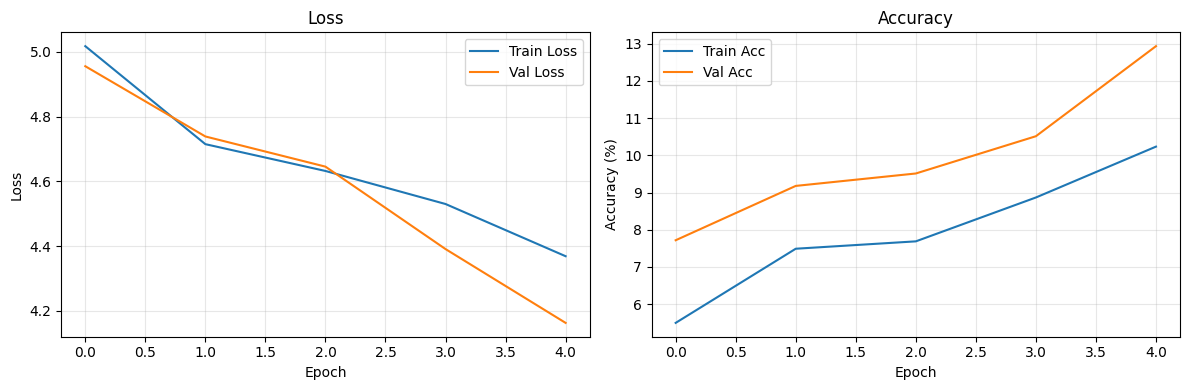

In [ ]:
# Modelo de classificação
class RareSpeciesClassifier(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super(RareSpeciesClassifier, self).__init__()

        # Usar ResNet18 (mais leve) para teste
        self.backbone = models.resnet18(pretrained=pretrained)

        # Substituir camada final
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(in_features, 256),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# Trainer simples
class SimpleTrainer:
    def __init__(self, model, train_loader, val_loader, device):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device

        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=5, gamma=0.1)

        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': []
        }

    def train_epoch(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch_idx, (images, labels) in enumerate(self.train_loader):
            images, labels = images.to(self.device), labels.to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(images)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            if batch_idx % 20 == 0:
                current_acc = 100. * correct / total
                print(f'  Batch {batch_idx:3d}: Loss: {loss.item():.4f}, Acc: {current_acc:.2f}%')

        epoch_loss = total_loss / len(self.train_loader)
        epoch_acc = 100. * correct / total
        return epoch_loss, epoch_acc

    def validate(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in self.val_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        epoch_loss = total_loss / len(self.val_loader)
        epoch_acc = 100. * correct / total
        return epoch_loss, epoch_acc

    def train(self, epochs):
        print("🚀 Iniciando treinamento...")
        best_val_acc = 0

        for epoch in range(epochs):
            print(f'\nEpoch {epoch+1}/{epochs}')
            print('-' * 40)

            # Treino
            train_loss, train_acc = self.train_epoch()

            # Validação
            val_loss, val_acc = self.validate()

            # Atualizar scheduler
            self.scheduler.step()

            # Salvar histórico
            self.history['train_loss'].append(train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_acc'].append(val_acc)

            print(f'📊 Train - Loss: {train_loss:.4f}, Acc: {train_acc:.2f}%')
            print(f'📈 Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%')

            # Salvar melhor modelo
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'val_acc': val_acc,
                    'label_encoder': train_dataset.label_encoder
                }, 'best_model.pth')
                print(f'💾 Melhor modelo salvo! Acc: {val_acc:.2f}%')

    def plot_history(self):
        import matplotlib.pyplot as plt

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Loss
        ax1.plot(self.history['train_loss'], label='Train Loss')
        ax1.plot(self.history['val_loss'], label='Val Loss')
        ax1.set_title('Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Accuracy
        ax2.plot(self.history['train_acc'], label='Train Acc')
        ax2.plot(self.history['val_acc'], label='Val Acc')
        ax2.set_title('Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Função de treinamento
def train_model(train_loader, val_loader, num_classes, epochs=5):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"🖥️  Dispositivo: {device}")

    model = RareSpeciesClassifier(num_classes=num_classes).to(device)

    # Contar parâmetros
    total_params = sum(p.numel() for p in model.parameters())
    print(f"📦 Total de parâmetros: {total_params:,}")

    trainer = SimpleTrainer(model, train_loader, val_loader, device)
    trainer.train(epochs)
    trainer.plot_history()

    return trainer, model

# Executar treinamento se tudo estiver ok
if 'train_loader' in locals() and train_dataset.num_classes > 1:
    print("\n" + "="*60)
    print("INICIANDO TREINAMENTO")
    print("="*60)

    trainer, model = train_model(train_loader, val_loader, train_dataset.num_classes, epochs=5)
else:
    print("Dataloaders não disponíveis para treinamento")


ANÁLISE FINAL DO DATASET RARE SPECIES
📊 Total de exemplos: 11,983

🌿 DISTRIBUIÇÃO TAXONÔMICA:
   kingdom :    1 categorias únicas
   phylum  :    5 categorias únicas
   class   :   15 categorias únicas
   order   :   85 categorias únicas
   family  :  202 categorias únicas
   genus   :  316 categorias únicas
   species :  385 categorias únicas

📈 ESTATÍSTICAS DE ESPÉCIES:
   Total de espécies: 385
   Espécies com 30 imagens: 367
   Espécies com <30 imagens: 5

🏆 TOP 10 ESPÉCIES MAIS COMUNS:
   maximus: 90 imagens
   gigas: 90 imagens
   obscurus: 60 imagens
   auratus: 60 imagens
   japonica: 60 imagens
   cervicornis: 60 imagens
   brevirostris: 60 imagens
   coronatus: 60 imagens
   brasiliensis: 60 imagens
   kirtlandii: 60 imagens

🎯 SUGESTÕES PARA CLASSIFICAÇÃO:
   Family level: 202 classes
   Genus level: 316 classes
   Species level: 385 classes
   ⚠️  Desafio: Muitas classes para Species level

🖼️  VISUALIZANDO AMOSTRAS DE TREINO:


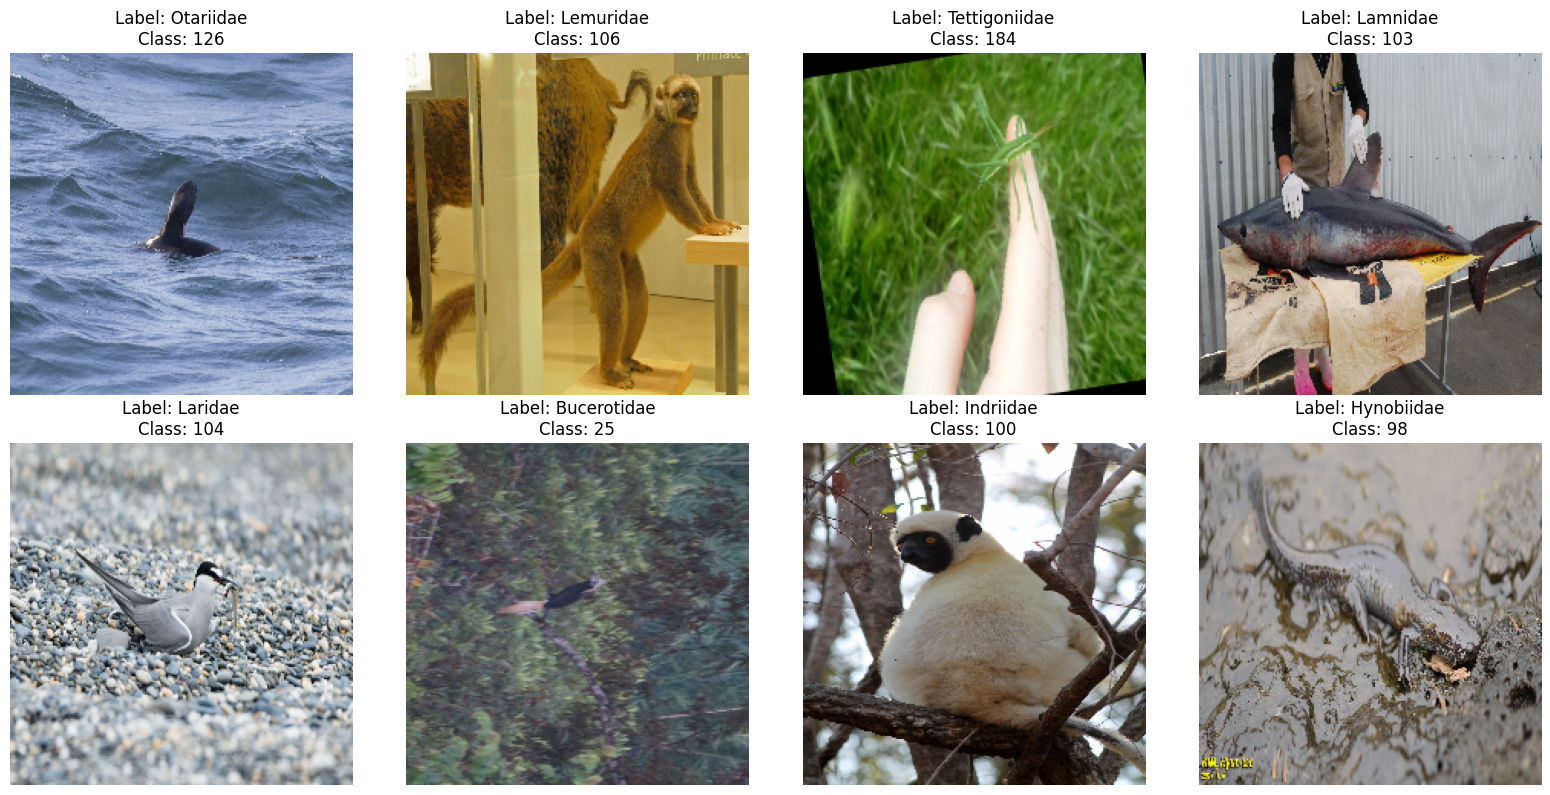

In [ ]:
# Análise final do dataset
def final_dataset_analysis(train_data):
    print("\n" + "="*60)
    print("ANÁLISE FINAL DO DATASET RARE SPECIES")
    print("="*60)

    # Informações básicas
    print(f"📊 Total de exemplos: {len(train_data):,}")

    # Análise taxonômica
    taxonomic_levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

    print(f"\n🌿 DISTRIBUIÇÃO TAXONÔMICA:")
    for level in taxonomic_levels:
        values = train_data[level]
        unique_count = len(set(values))
        print(f"   {level:8}: {unique_count:4} categorias únicas")

    # Análise de espécies
    species_counts = Counter(train_data['species'])
    print(f"\n📈 ESTATÍSTICAS DE ESPÉCIES:")
    print(f"   Total de espécies: {len(species_counts)}")
    print(f"   Espécies com 30 imagens: {sum(1 for count in species_counts.values() if count == 30)}")
    print(f"   Espécies com <30 imagens: {sum(1 for count in species_counts.values() if count < 30)}")

    # Top espécies
    print(f"\n🏆 TOP 10 ESPÉCIES MAIS COMUNS:")
    for species, count in species_counts.most_common(10):
        print(f"   {species}: {count} imagens")

    # Análise de famílias para classificação
    family_counts = Counter(train_data['family'])
    print(f"\n🎯 SUGESTÕES PARA CLASSIFICAÇÃO:")
    print(f"   Family level: {len(family_counts)} classes")
    print(f"   Genus level: {len(set(train_data['genus']))} classes")
    print(f"   Species level: {len(species_counts)} classes")

    # Recomendação
    if len(family_counts) <= 50:
        print("   Recomendado: Classificação por Family")
    elif len(set(train_data['genus'])) <= 100:
        print("  Recomendado: Classificação por Genus")
    else:
        print("   Desafio: Muitas classes para Species level")

# Executar análise final
final_dataset_analysis(train_data)

# Visualizar algumas imagens de treino
def visualize_training_samples(train_loader, train_dataset, num_samples=8):
    print(f"\n🖼️  VISUALIZANDO AMOSTRAS DE TREINO:")

    # Pegar um batch
    for images, labels in train_loader:
        images = images.cpu()
        labels = labels.cpu()

        # Converter para numpy para visualização
        images_np = images.permute(0, 2, 3, 1).numpy()
        images_np = images_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        images_np = np.clip(images_np, 0, 1)

        # Plot
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        axes = axes.flatten()

        for i in range(min(num_samples, len(images))):
            axes[i].imshow(images_np[i])
            label_name = train_dataset.label_encoder.inverse_transform([labels[i].item()])[0]
            axes[i].set_title(f'Label: {label_name}\nClass: {labels[i].item()}')
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()
        break

# Visualizar amostras se possível
try:
    visualize_training_samples(train_loader, train_dataset)
except Exception as e:
    print(f" Não foi possível visualizar amostras: {e}")